<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/EDA_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import sys
import numpy as np
import warnings
!cat '/content/drive/MyDrive/Label_Master Forecasting Datasets/feature_selector.py'
sys.path.append('/content/drive/MyDrive/Label_Master Forecasting Datasets/')
from feature_selector import FeatureSelector
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.inf)

In [3]:
books = pd.read_csv('/content/drive/MyDrive/Label_Master Forecasting Datasets/Books_ext.csv', index_col=0)
books

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Import

In [4]:
books = books.drop(books.index[155:157])
books = books.set_index(keys='Year_Month')
books

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,...,National Avg. Diesel/Gal._y.1,Distillate Fuel Inventories (Mil Barrels/Day)_y.1,Change in Distillate Fuel Inventories_y.1,W. Texas Int. Crude Oil ($Bbl.)_y.1,Intermodal Revenue Movements (IANA-ETSO)_Total_y.1,Intermodal Revenue Movements (IANA-ETSO)_International_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic_y.1,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_y.1,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_y.1,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_y.1","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_y.1",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_y.1,U.S. Origin Intermodal Volumes_International_y.1,U.S. Origin Intermodal Volumes_Domestic_y.1,U.S. Origin Intermodal Volumes_Total_y.1,Canada Origin Intermodal Volumes_International_y.1,Canada Origin Intermodal Volumes_Domestic_y.1,Canada Origin Intermodal Volumes_Total_y.1,Mexico Origin Intermodal Volumes_International_y.1,Mexico Origin Intermodal Volumes_Domestic_y.1,Mexico Origin Intermodal Volumes_Total_y.1,"N.A. Port Activity, Total TEUs_Imports_y.1","N.A. Port Activity, Total TEUs_Exports_y.1","N.A. Port Activity, Total TEUs_SA Imports_y.1","West Coast Port Activity, Total TEUs_Imports_y.1","West Coast Port Activity, Total TEUs_Exports_y.1","West Coast Port Activity, Total TEUs_SA Imports_y.1","East Coast Port Activity, Total TEUs_Imports_y.1","East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Can

### Check whethere there are duplicate columns

In [5]:
def getDuplicateColumns(df): 
    duplicateColumnNames = set()  
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]):     
        # Take column at xth index. 
        col = df.iloc[:, x] 
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y])      
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [6]:
dups = getDuplicateColumns(books)
dups

["Manufacturing Employment (000's)_economics_m_trucking_trailer",
 'Canada Origin Intermodal Volumes_International_y',
 "New Home Sales (000's)_x",
 'Private Residential Construction (Mil $)_x',
 'Total Bus. Inventories/Retail Sales Ratio_y.1',
 'Western Canadian Port Activity, Total TEUs_Exports_x.1',
 'W. Texas Int. Crude Oil ($Bbl.)_y.1',
 'West Coast Port Activity, Total TEUs_Imports_y.1',
 'Change in Distillate Fuel Inventories_y.1',
 'Total Manufacturing Index_y.1',
 'ISM Manufacturing Index_x',
 'Total Bus. Inventories/Retail Sales Ratio_economics_m_trucking_trailer',
 'Gulf Coast Port Activity, Total TEUs_Imports_x.1',
 'Mexico Origin Intermodal Volumes_International_y.1',
 'Consumer Price Index_x',
 'Chemicals Index_y',
 'S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_y.1',
 'Private Non-Residential Construction (Mil $)_x.1',
 'Durable Manufacturing Index_y',
 'PAYEMS_driver_indicators_m_trucking',
 'Mexico Origin Intermodal 

In [7]:
books = books.drop(columns=dups)
books

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Stone, Clay, Glass & Concrete (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking","Transportation Equipment (000s, SA)_freight_m_trucking","All Other Freight (000s, SA)_freight_m_trucking",Short-Haul (<125 mi)_freight_m_trucking,Medium-Haul (from 125 to 299 mi)_freight_m_trucking,Long-Haul (from 300 to 549 mi)_freight_m_trucking,Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Heavy-Duty Truck Tonnage (000s, SA)_freight_m_trucking",FTR Heavy-Duty Truck Tonnage Index (2000=100)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",FTR Rail Intermodal Loadings Index (2000=100)_freight_m_trucking,Truckload (TL) Rates (rev/mi)_rates_m_trucking,Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total TL Rates (w/o FSC)_rates_m_trucking,Total TL Rates w/Fuel_rates_m_trucking,Spot TL Dry Van Rates (w/o FSC)_rates_m_trucking,Spot TL Dry Van Rates w/Fuel_rates_m_trucking,Contract TL Dry Van Rates (w/o FSC)_rates_m_trucking,Contract TL Dry Van Rates w/Fuel_rates_m_trucking,Total TL Dry Van Rates (w/o FSC)_rates_m_trucking,Total TL Dry Van Rates_rates_m_trucking,Spot TL Reefer Rates (w/o FSC)_rates_m_trucking,Spot TL Reefer Rates w/Fuel_rates_m_trucking,Contract TL Reefer Rates (w/o FSC)_rates_m_trucking,Contract TL Reefer Rates w/Fuel_rates_m_trucking,...,INVENTORY_MEMO_Major_Voc,NET ORDERS_MEMO_Major_Voc,FACTORY SHIPMENTS_MEMO_Major_Voc,Backlog/ \r\nBuild Ratio_MEMO_Major_Voc,Inventory/Factory Shipments Ratio_MEMO_Major_Voc,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,Intermodal Revenue Movements (IANA-ETSO)_International_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic_x,Intermodal Revenue Movements (IANA-ETSO)_Domestic Containers_x,Intermodal Revenue Movements (IANA-ETSO)_Memo: Domestic Containers & 53'+ Trailers_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_International Movements Index (Jan 2001 = 100)_x,S.A. Total Revenue Movements Index (Jan 2001 = 100)_Domestic Movements Index (Jan 2001 = 100)_x,"Container Share %, Total Intermodal_Total Domestic % (Dom. Container+Trailers)_x","Container Share %, Total Intermodal_Truckload Only % (Dom. Container+53' Trailers)_x",FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,U.S. Origin Intermodal Volumes_Domestic_x,U.S. Origin Intermodal Volumes_Total_x,Canada Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,Canada Origin Intermodal Volumes_Total_x,Mexico Origin Intermodal Volumes_International_x,Mexico Origin Intermodal Volumes_Domestic_x,Mexico Origin Intermodal Volumes_Total_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","N.A. Port Activity, Total TEUs_SA Imports_x","West Coast Port Activity, Total TEUs_Imports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian P

###Feature Selection

In [8]:
X = books.drop(columns='Sum of Sales')
X.head()
y = books['Sum of Sales']
y

Year_Month
2008-01     282604.11
2008-02     262474.40
2008-03     326059.68
2008-04     215387.49
2008-05     499559.90
              ...    
2020-07     150348.10
2020-08     156066.95
2020-09     468710.96
2020-10    1118446.80
2020-11     429166.77
Name: Sum of Sales, Length: 155, dtype: float64

In [9]:
fs=FeatureSelector(data=X, labels=y)

#### Check missing values

In [11]:
fs.identify_missing(missing_threshold=0.3)

78 features with greater than 0.30 missing values.



In [12]:
fs.ops['missing']

['Truckload (TL) Rates (rev/mi)_rates_m_trucking',
 'SP500_indicators_m_trucking',
 'EHS_indicators_m_trucking',
 'BACKLOG_Total_Trailer',
 'INVENTORY_Total_Trailer',
 'NET ORDERS_Total_Trailer',
 'FACTORY SHIPMENTS_Total_Trailer',
 'Backlog/ \r\nBuild Ratio_Total_Trailer',
 'Inventory/Factory Shipments Ratio_Total_Trailer',
 'BACKLOG_Dry_Van',
 'INVENTORY_Dry_Van',
 'NET ORDERS_Dry_Van',
 'FACTORY SHIPMENTS_Dry_Van',
 'Backlog/ \r\nBuild Ratio_Dry_Van',
 'Inventory/Factory Shipments Ratio_Dry_Van',
 'BACKLOG_Reefer_Van',
 'INVENTORY_Reefer_Van',
 'NET ORDERS_Reefer_Van',
 'FACTORY SHIPMENTS_Reefer_Van',
 'Backlog/ \r\nBuild Ratio_Reefer_Van',
 'Inventory/Factory Shipments Ratio_Reefer_Van',
 'BACKLOG_Flatbed',
 'INVENTORY_Flatbed',
 'NET ORDERS_Flatbed',
 'FACTORY SHIPMENTS_Flatbed',
 'Backlog/ \r\nBuild Ratio_Flatbed',
 'Inventory/Factory Shipments Ratio_Flatbed',
 'BACKLOG_Liquid_Tank',
 'INVENTORY_Liquid_Tank',
 'NET ORDERS_Liquid_Tank',
 'FACTORY SHIPMENTS_Liquid_Tank',
 'Backlog/

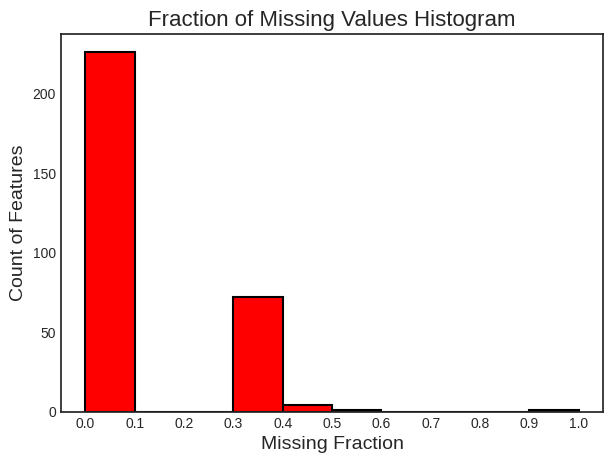

In [13]:
fs.plot_missing()

#### Check Collinearity

In [14]:
fs.identify_collinear(correlation_threshold=0.9)

178 features with a correlation magnitude greater than 0.90.



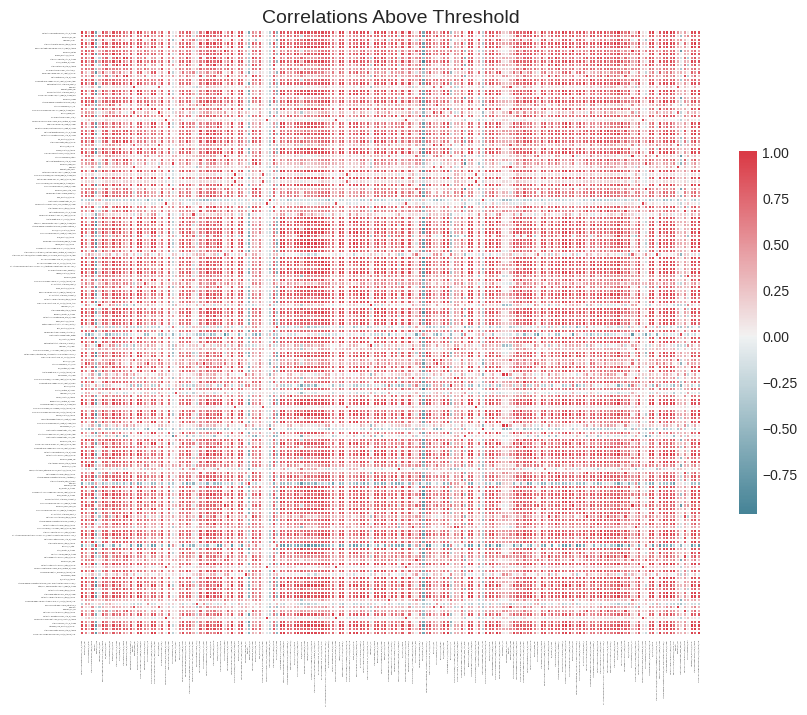

In [15]:
fs.plot_collinear()

In [16]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,FTR Truck Loadings Index (2000=100)_freight_m_...,"FTR Truck Loadings (000s, SA)_freight_m_trucking",1.000000
1,"Dry Van Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.960822
2,"Dry Van Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.960822
3,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.994974
4,"Flatbed Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.994974
5,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.957094
6,"Bulk Trailer/Straight Truck Loadings (000s, SA...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.992075
7,"Bulk Trailer/Straight Truck Loadings (000s, SA...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.992075
8,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.933677
9,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Flatbed Trailer Loadings (000s, SA)_freight_m_...",0.988296


#### Check zero importance features

In [17]:
fs.identify_zero_importance(task='regression', eval_metric='mse', early_stopping=False)


Training Gradient Boosting Model


38 features with zero importance after one-hot encoding.



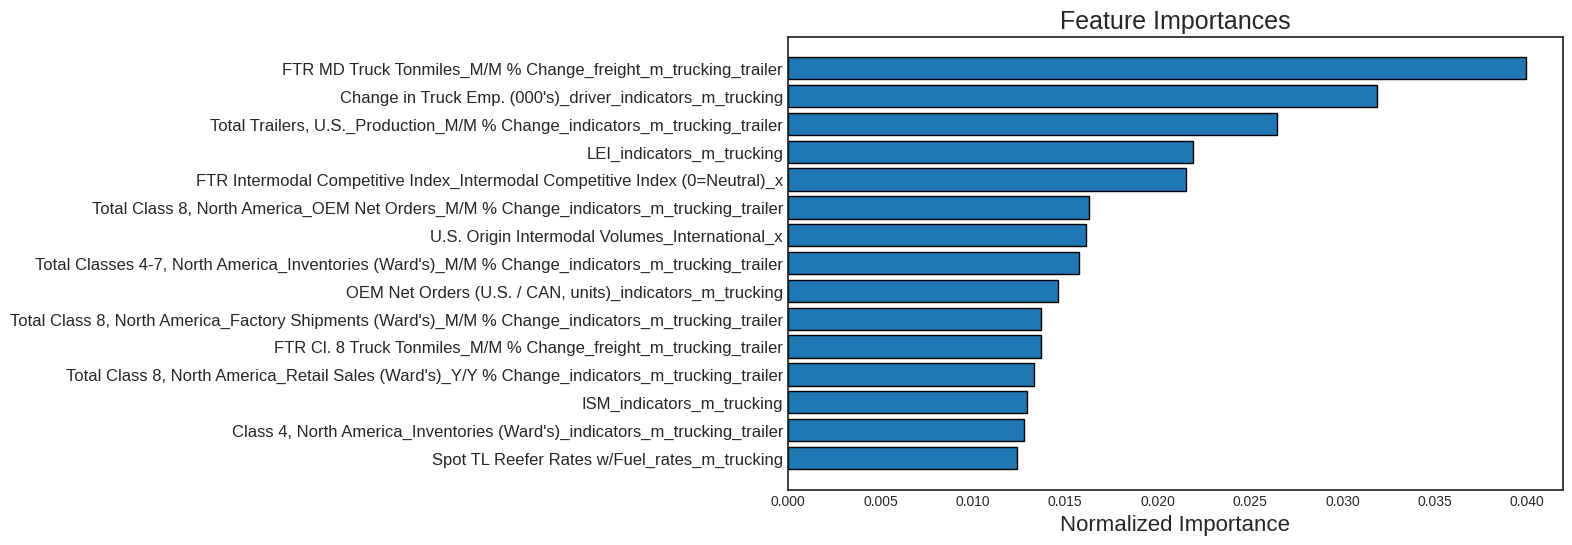

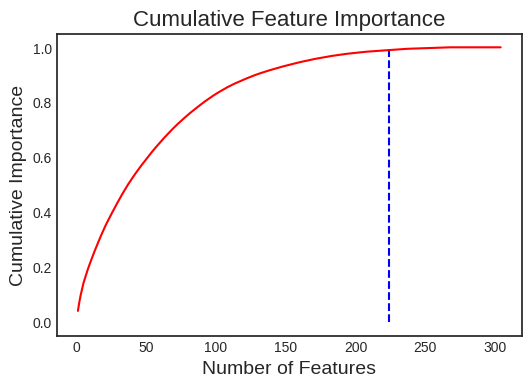

224 features required for 0.99 of cumulative importance


In [18]:
fs.plot_feature_importances(threshold=0.99)

#### Check Low Importance Features

In [19]:
fs.identify_low_importance(cumulative_importance=0.99)
fs.feature_importances.head(20)

223 features required for cumulative importance of 0.99 after one hot encoding.
81 features do not contribute to cumulative importance of 0.99.



,feature,importance,normalized_importance,cumulative_importance
0,FTR MD Truck Tonmiles_M/M % Change_freight_m_t...,213.0,0.039940,0.039940
1,Change in Truck Emp. (000's)_driver_indicators...,170.0,0.031877,0.071817
2,"Total Trailers, U.S._Production_M/M % Change_i...",141.0,0.026439,0.098256
3,LEI_indicators_m_trucking,117.0,0.021939,0.120195
4,FTR Intermodal Competitive Index_Intermodal Co...,115.0,0.021564,0.141759
5,"Total Class 8, North America_OEM Net Orders_M/...",87.0,0.016314,0.158072
6,U.S. Origin Intermodal Volumes_International_x,86.0,0.016126,0.174198
7,"Total Classes 4-7, North America_Inventories (...",84.0,0.015751,0.189949
8,"OEM Net Orders (U.S. / CAN, units)_indicators_...",78.0,0.014626,0.204575
9,"Total Class 8, North America_Factory Shipments...",73.0,0.013688,0.218264


#### Remove features

In [21]:
feature_selected = fs.remove(methods=['missing','collinear','zero_importance','low_importance'])
features = np.append(list(['Sum of Sales']),list(feature_selected.columns))
books = books[features]
books

Removed 226 features.


,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking","New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking",B50001_indicators_m_trucking,GMFN_indicators_m_trucking,G325_indicators_m_trucking,G332_indicators_m_trucking,ISM_indicators_m_trucking,PORTEU_indicators_m_trucking,CASS_indicators_m_trucking,MANEMP_indicators_m_trucking,USTRADE_indicators_m_trucking,LEI_indicators_m_trucking,SPREAD_indicators_m_trucking,ISRATIO_indicators_m_trucking,NDCGO_indicators_m_trucking,CF3M_indicators_m_trucking,PUBCON_indicators_m_trucking,D/GAL_indicators_m_trucking,D/STOCK_indicators_m_trucking,Change in Payroll Employment (000's)_driver_indicators_m_trucking,Change in Truck Emp. (000's)_driver_indicators_m_trucking,LABORINDEX_driver_indicators_m_trucking,"Total Class 8, North America_OEM Net Orders_indicators_m_trucking_trailer","Total Class 8, North America_OEM Net Orders_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_OEM Net Orders_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Carloadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Class 8 Truck Utilization (%, SA)_freight_m_trucking_trailer",BUILD FOR_Total_Trailer,BUILD FOR_Flatbed,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,Change in